In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import data
import train

In [3]:
input_dim=16
batch_size=2000
k=4
T = 10000
agg_steps = range(0, T+1, 200)
plot_steps = range(200, T+1, 200)
min_true_vars = 4
max_true_vars = 8

In [ ]:
disjoint_mixed_pool = data.create_mixed_clause_pool_random_disjoint(
    global_input_dim=input_dim,
    pool_size=256,
    features_per_and=4,
    seed=8,
)
# Create formula with disjoint clauses
formula = disjoint_mixed_pool[:4]
formula

[[(8, False), (10, False), (14, False), (15, False)],
 [(4, False), (9, False), (11, False), (13, False)],
 [(0, False), (1, False), (3, False), (12, False)],
 [(2, False), (5, False), (6, False), (7, False)]]

In [5]:
dset = data.create_dataset(
    cset=formula,
    input_dim=input_dim,
    train_size=10000,
    test_size=1000,
    min_true_vars=min_true_vars,
    max_true_vars=max_true_vars,
    batch_size=batch_size,
)
train_data, test_data = dset
# Shared for all run
test_loader = data.create_dataloader(test_data, batch_size=batch_size)
# Original set up, random labels and permutation
train_loader = data.create_dataloader(train_data, batch_size=batch_size)

original: using new random 4-AND formula => [[(8, False), (10, False), (14, False), (15, False)], [(4, False), (9, False), (11, False), (13, False)], [(0, False), (1, False), (3, False), (12, False)], [(2, False), (5, False), (6, False), (7, False)]]
num_batches: 5
original: epoch=0/5, trainErr: 0.6762, testErr: 0.0000, 0P4N_pos: 0.0000, 0P4N_neg: 3.0000, 1P3N_pos: 13.0000, 1P3N_neg: 6.0000, 2P2N_pos: 14.0000, 2P2N_neg: 9.0000, 3P1N_pos: 12.0000, 3P1N_neg: 3.0000, 4P0N_pos: 1.0000, 4P0N_neg: 3.0000, total_kp_pos: 1.0000, sum_of_clauseOverlaps_kp_pos: 0.0000, overlap_kp_pos_with_prior: 0.0000, total_kp_neg: 3.0000, sum_of_clauseOverlaps_kp_neg: 1.0000, overlap_kp_neg_with_prior: 0.0000, numNonzeroW1: 256.0000, numNonzeroW2: 16.0000
Training 1666 batches
original: epoch=1666/5, trainErr: 0.5580, testErr: 0.0000, 0P4N_pos: 0.0000, 0P4N_neg: 0.0000, 1P3N_pos: 0.0000, 1P3N_neg: 10.0000, 2P2N_pos: 13.0000, 2P2N_neg: 14.0000, 3P1N_pos: 17.0000, 3P1N_neg: 6.0000, 4P0N_pos: 2.0000, 4P0N_neg: 2.

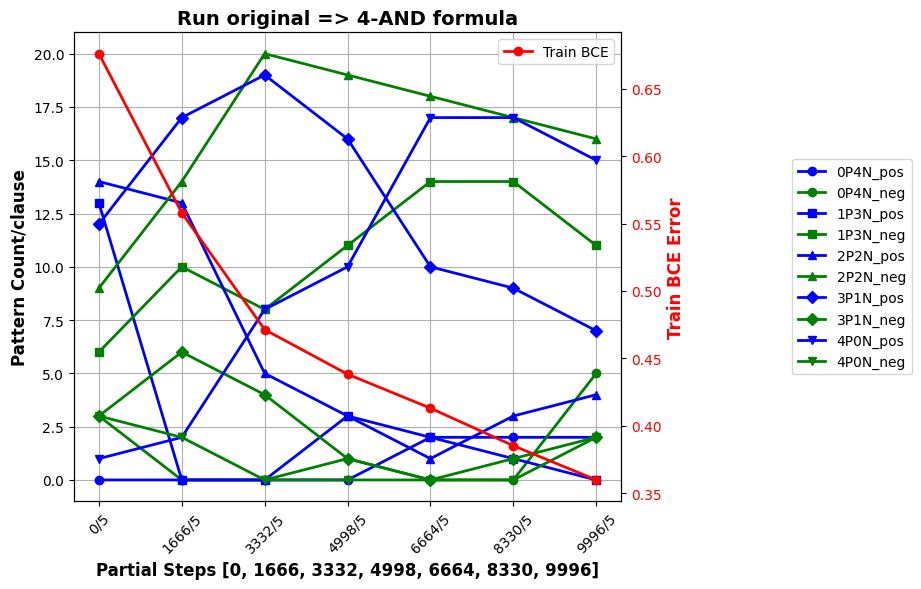

/home1/czhang/Neural-Computation/stats.py:347: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0,0,1,0.93])


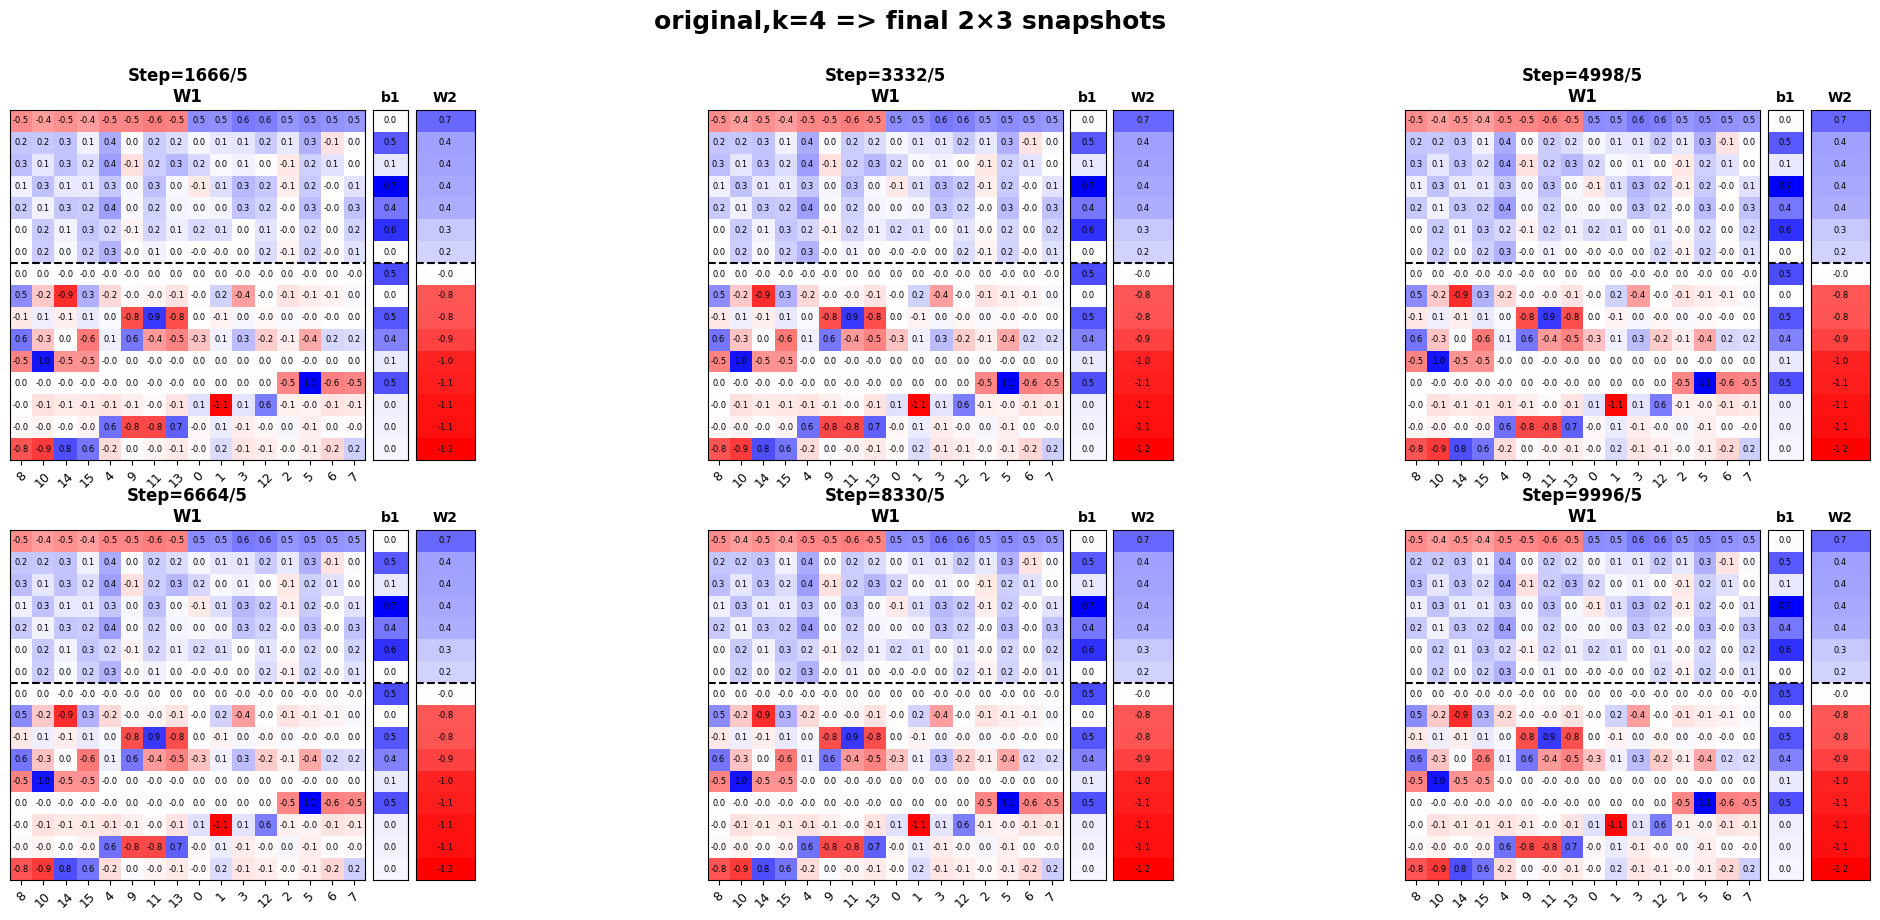

Saved => ./pdfs/original,k=4_final_6snap_2x3.pdf


(<utils.ExperimentRun at 0x7fb6f67c4410>,
 ComplexModel(
   (fc1): Linear(in_features=16, out_features=16, bias=True)
   (relu): ReLU()
   (fc2): Linear(in_features=16, out_features=1, bias=True)
 ))

In [57]:
train.run_single_model(
    run_name="original",
    max_aggregator_steps=agg_steps,
    plot_steps=plot_steps,
    input_dim=input_dim,
    hidden_dim=input_dim,
    num_features_per_clause=k,
    train_loader=train_loader,
    test_loader=test_loader,
    base_dir=".",
    l2_reg_factor=0,
    l1_reg_factor=1e-4,
    seed_offset=0,
    cset=formula,
    visualize=True,
    verbose=True
)

original: using new random 4-AND formula => [[(8, False), (10, False), (14, False), (15, False)], [(4, False), (9, False), (11, False), (13, False)], [(0, False), (1, False), (3, False), (12, False)], [(2, False), (5, False), (6, False), (7, False)]]
num_batches: 5
original: epoch=0/5, trainErr: 0.6762, testErr: 0.0000, 0P4N_pos: 0.0000, 0P4N_neg: 3.0000, 1P3N_pos: 13.0000, 1P3N_neg: 6.0000, 2P2N_pos: 14.0000, 2P2N_neg: 9.0000, 3P1N_pos: 12.0000, 3P1N_neg: 3.0000, 4P0N_pos: 1.0000, 4P0N_neg: 3.0000, total_kp_pos: 1.0000, sum_of_clauseOverlaps_kp_pos: 0.0000, overlap_kp_pos_with_prior: 0.0000, total_kp_neg: 3.0000, sum_of_clauseOverlaps_kp_neg: 1.0000, overlap_kp_neg_with_prior: 0.0000, numNonzeroW1: 256.0000, numNonzeroW2: 16.0000
Training 1666 batches


original: epoch=1666/5, trainErr: 0.5708, testErr: 0.0000, 0P4N_pos: 0.0000, 0P4N_neg: 3.0000, 1P3N_pos: 2.0000, 1P3N_neg: 8.0000, 2P2N_pos: 7.0000, 2P2N_neg: 14.0000, 3P1N_pos: 17.0000, 3P1N_neg: 6.0000, 4P0N_pos: 6.0000, 4P0N_neg: 1.0000, total_kp_pos: 6.0000, sum_of_clauseOverlaps_kp_pos: 2.0000, overlap_kp_pos_with_prior: 0.0000, total_kp_neg: 1.0000, sum_of_clauseOverlaps_kp_neg: 0.0000, overlap_kp_neg_with_prior: 0.0000, numNonzeroW1: 256.0000, numNonzeroW2: 16.0000
Training 1666 batches
original: epoch=3332/5, trainErr: 0.4891, testErr: 0.0000, 0P4N_pos: 2.0000, 0P4N_neg: 8.0000, 1P3N_pos: 1.0000, 1P3N_neg: 9.0000, 2P2N_pos: 7.0000, 2P2N_neg: 8.0000, 3P1N_pos: 12.0000, 3P1N_neg: 2.0000, 4P0N_pos: 14.0000, 4P0N_neg: 1.0000, total_kp_pos: 14.0000, sum_of_clauseOverlaps_kp_pos: 18.0000, overlap_kp_pos_with_prior: 6.0000, total_kp_neg: 1.0000, sum_of_clauseOverlaps_kp_neg: 0.0000, overlap_kp_neg_with_prior: 0.0000, numNonzeroW1: 256.0000, numNonzeroW2: 16.0000
Training 1666 batches


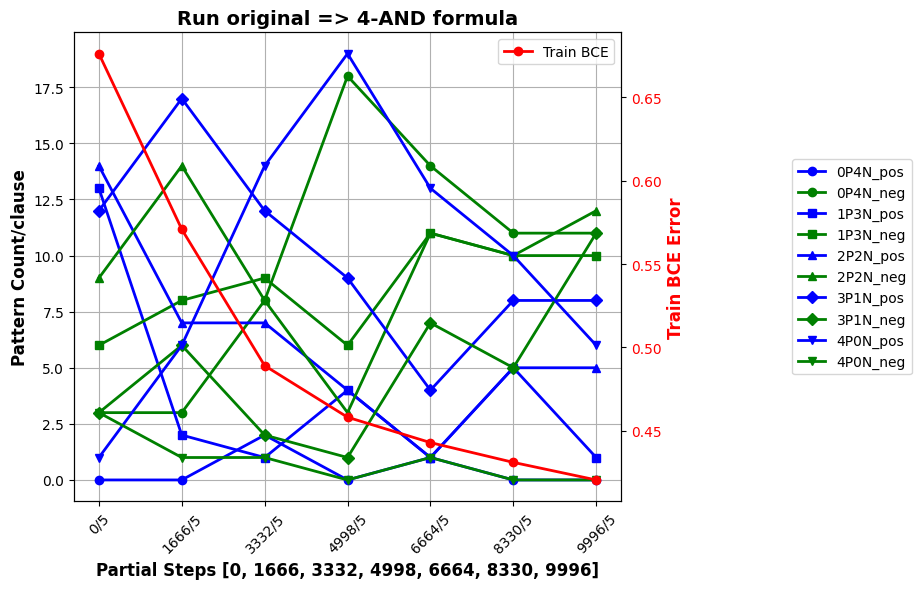

/home1/czhang/Neural-Computation/stats.py:347: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0,0,1,0.93])


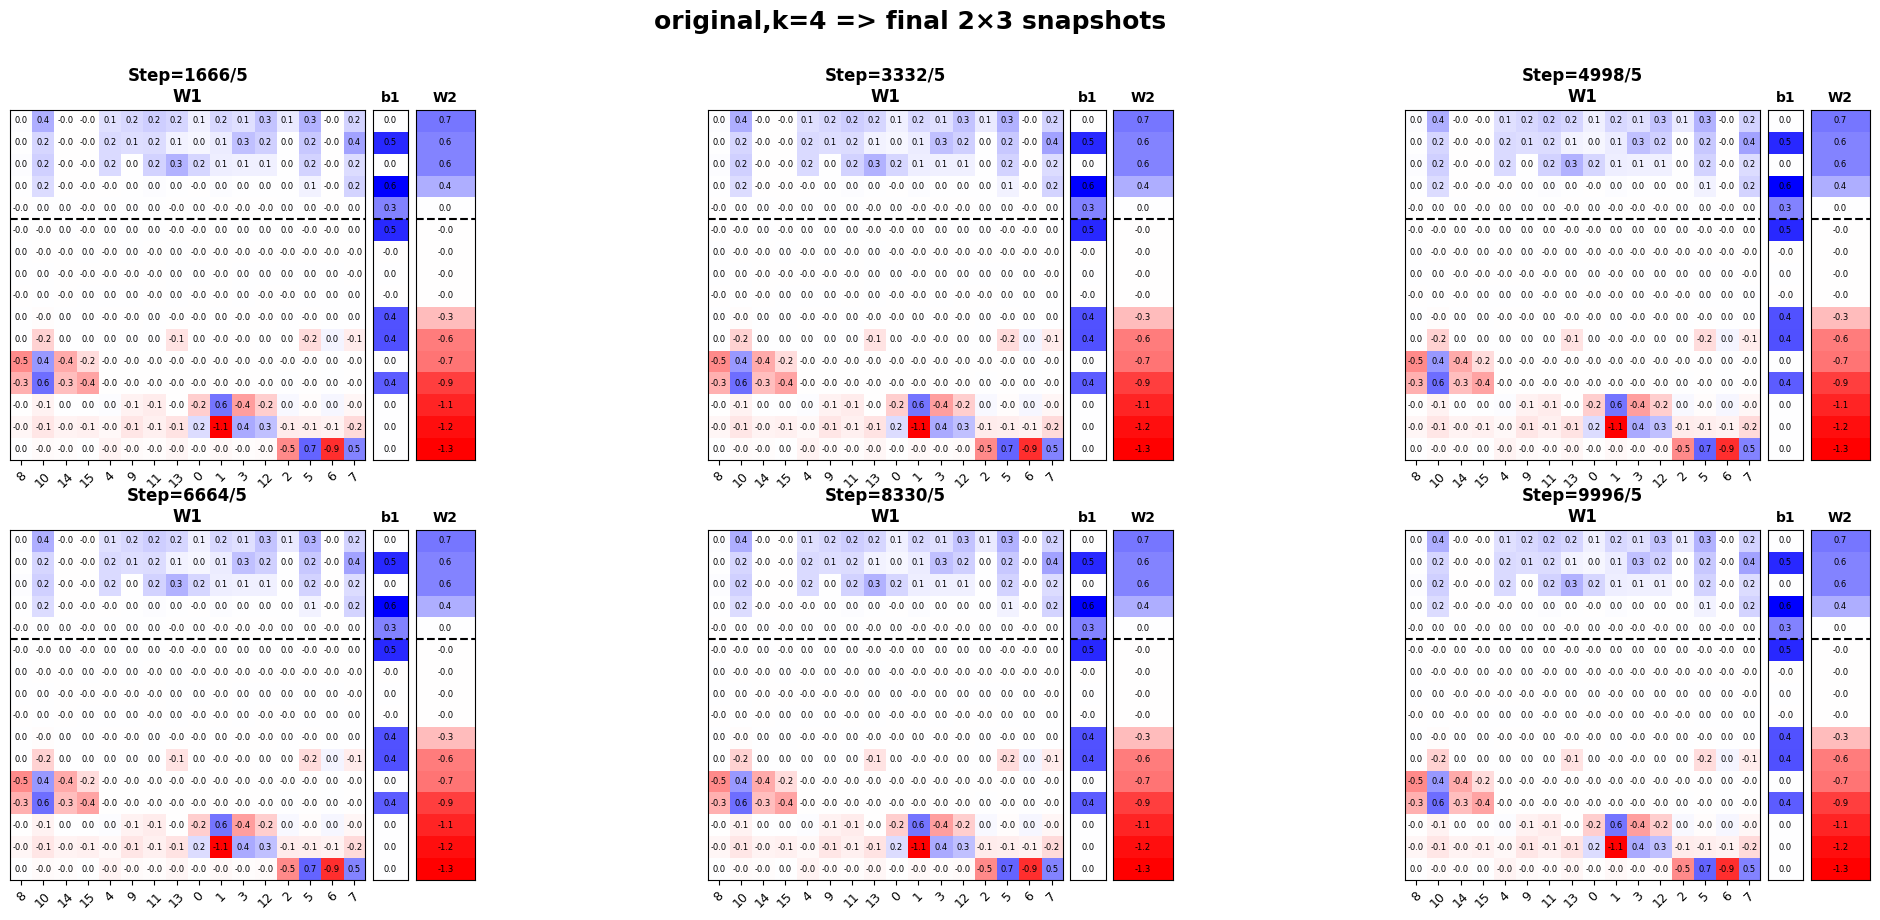

Saved => ./pdfs/original,k=4_final_6snap_2x3.pdf


(<utils.ExperimentRun at 0x7fb6efec6950>,
 ComplexModel(
   (fc1): Linear(in_features=16, out_features=16, bias=True)
   (relu): ReLU()
   (fc2): Linear(in_features=16, out_features=1, bias=True)
 ))

In [58]:
train.run_single_model(
    run_name="original",
    max_aggregator_steps=agg_steps,
    plot_steps=plot_steps,
    input_dim=input_dim,
    hidden_dim=input_dim,
    num_features_per_clause=k,
    train_loader=train_loader,
    test_loader=test_loader,
    base_dir=".",
    l2_reg_factor=0,
    l1_reg_factor=1e-3,
    seed_offset=0,
    cset=formula,
    visualize=True,
    verbose=True
)

original: using new random 4-AND formula => [[(8, False), (10, False), (14, False), (15, False)], [(4, False), (9, False), (11, False), (13, False)], [(0, False), (1, False), (3, False), (12, False)], [(2, False), (5, False), (6, False), (7, False)]]


num_batches: 5
original: epoch=0/5, trainErr: 0.6762, testErr: 0.0000, 0P4N_pos: 0.0000, 0P4N_neg: 3.0000, 1P3N_pos: 13.0000, 1P3N_neg: 6.0000, 2P2N_pos: 14.0000, 2P2N_neg: 9.0000, 3P1N_pos: 12.0000, 3P1N_neg: 3.0000, 4P0N_pos: 1.0000, 4P0N_neg: 3.0000, total_kp_pos: 1.0000, sum_of_clauseOverlaps_kp_pos: 0.0000, overlap_kp_pos_with_prior: 0.0000, total_kp_neg: 3.0000, sum_of_clauseOverlaps_kp_neg: 1.0000, overlap_kp_neg_with_prior: 0.0000, numNonzeroW1: 256.0000, numNonzeroW2: 16.0000
Training 1666 batches
original: epoch=1666/5, trainErr: 0.5777, testErr: 0.0000, 0P4N_pos: 0.0000, 0P4N_neg: 2.0000, 1P3N_pos: 6.0000, 1P3N_neg: 9.0000, 2P2N_pos: 7.0000, 2P2N_neg: 11.0000, 3P1N_pos: 13.0000, 3P1N_neg: 5.0000, 4P0N_pos: 10.0000, 4P0N_neg: 1.0000, total_kp_pos: 10.0000, sum_of_clauseOverlaps_kp_pos: 6.0000, overlap_kp_pos_with_prior: 0.0000, total_kp_neg: 1.0000, sum_of_clauseOverlaps_kp_neg: 0.0000, overlap_kp_neg_with_prior: 1.0000, numNonzeroW1: 256.0000, numNonzeroW2: 16.0000
Training 

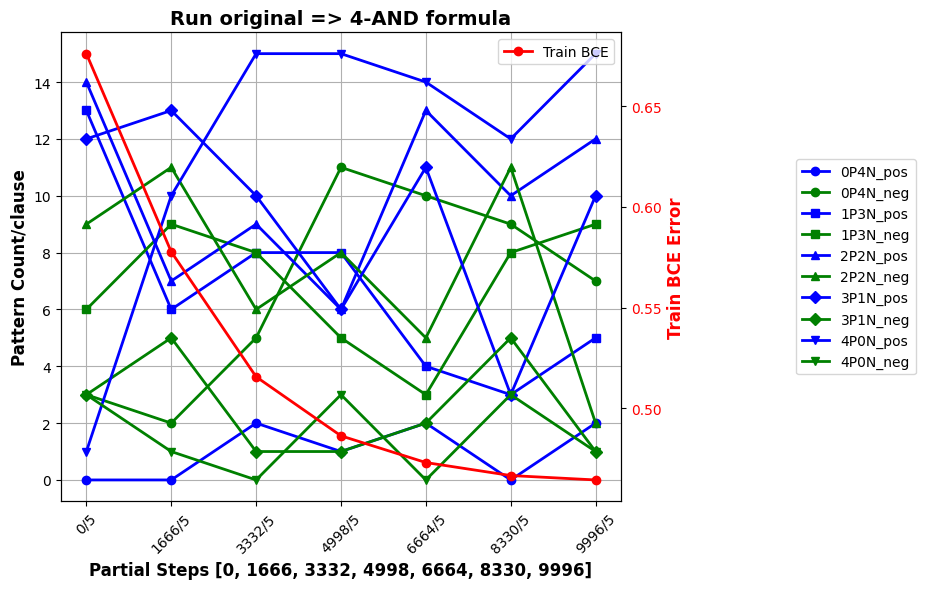

/home1/czhang/Neural-Computation/stats.py:347: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0,0,1,0.93])


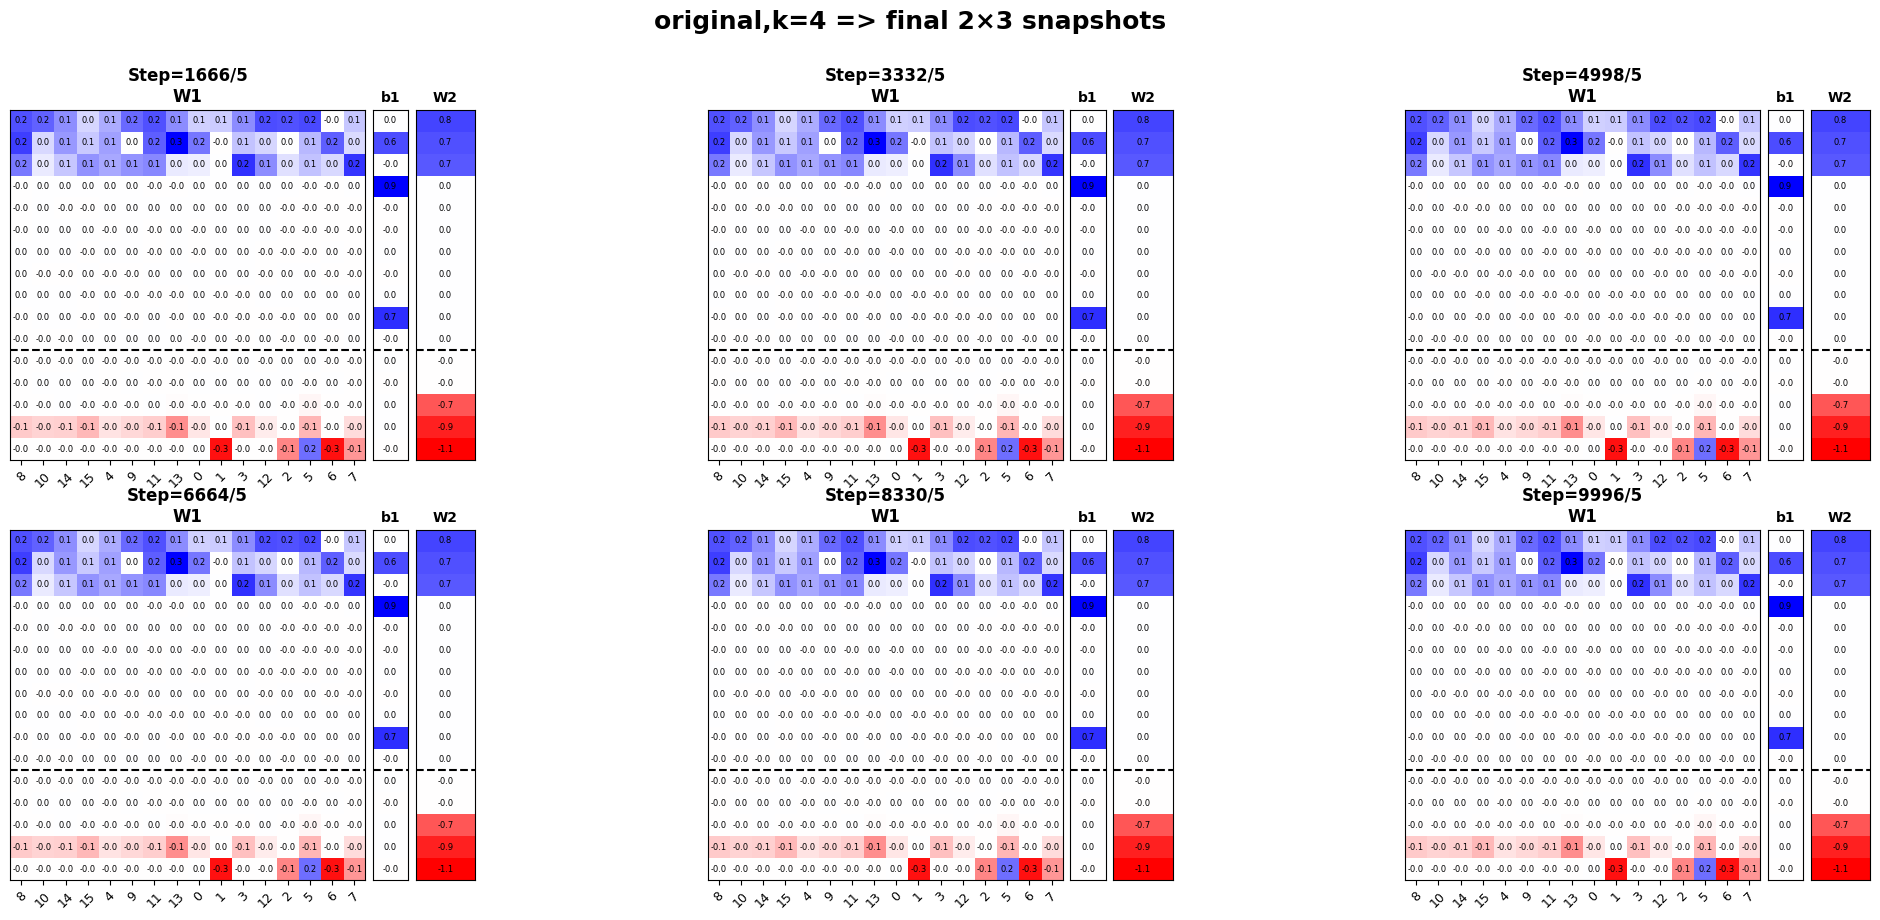

Saved => ./pdfs/original,k=4_final_6snap_2x3.pdf


(<utils.ExperimentRun at 0x7fb6eea05710>,
 ComplexModel(
   (fc1): Linear(in_features=16, out_features=16, bias=True)
   (relu): ReLU()
   (fc2): Linear(in_features=16, out_features=1, bias=True)
 ))

In [59]:
train.run_single_model(
    run_name="original",
    max_aggregator_steps=agg_steps,
    plot_steps=plot_steps,
    input_dim=input_dim,
    hidden_dim=input_dim,
    num_features_per_clause=k,
    train_loader=train_loader,
    test_loader=test_loader,
    base_dir=".",
    l2_reg_factor=0,
    l1_reg_factor=2e-3,
    seed_offset=0,
    cset=formula,
    visualize=True,
    verbose=True
)

p=.75: using new random 4-AND formula => [[(8, False), (10, False), (14, False), (15, False)], [(4, False), (9, False), (11, False), (13, False)], [(0, False), (1, False), (3, False), (12, False)], [(2, False), (5, False), (6, False), (7, False)]]
num_batches: 156
p=.75: epoch=0/5, trainErr: 0.687059, testErr: 0.552923, 0P4N_pos: 0.000000, 0P4N_neg: 3.000000, 1P3N_pos: 13.000000, 1P3N_neg: 6.000000, 2P2N_pos: 14.000000, 2P2N_neg: 9.000000, 3P1N_pos: 12.000000, 3P1N_neg: 3.000000, 4P0N_pos: 1.000000, 4P0N_neg: 3.000000, total_kp_pos: 1.000000, sum_of_clauseOverlaps_kp_pos: 0.000000, overlap_kp_pos_with_prior: 0.000000, total_kp_neg: 3.000000, sum_of_clauseOverlaps_kp_neg: 1.000000, overlap_kp_neg_with_prior: 0.000000, numNonzeroW1: 256.000000, numNonzeroW2: 16.000000
p=.75: epoch=0/5, trainErr: 0.687044, testErr: 0.551915, 0P4N_pos: 0.000000, 0P4N_neg: 3.000000, 1P3N_pos: 13.000000, 1P3N_neg: 6.000000, 2P2N_pos: 14.000000, 2P2N_neg: 9.000000, 3P1N_pos: 12.000000, 3P1N_neg: 3.000000, 4P0

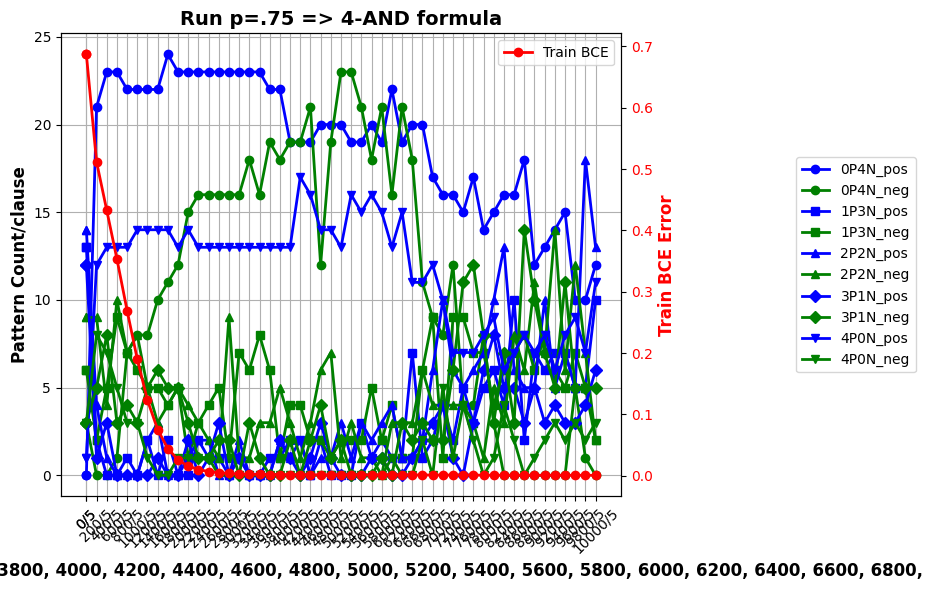

/home1/czhang/Neural-Computation/stats.py:347: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0,0,1,0.93])


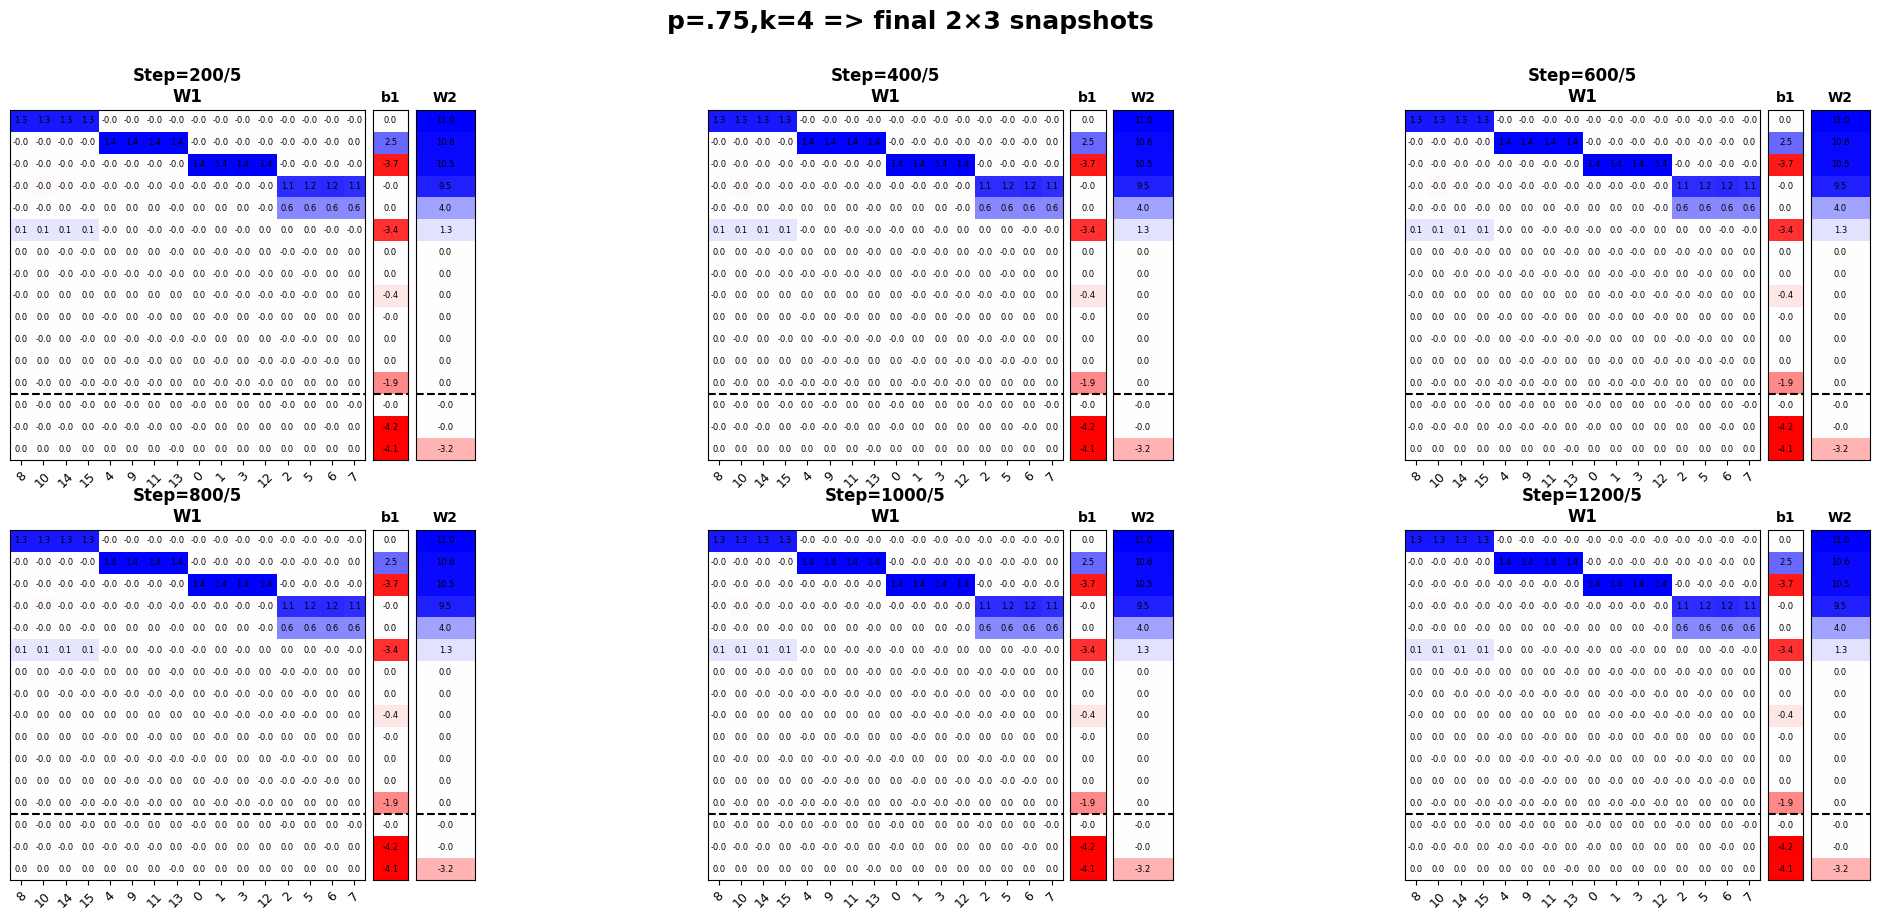

Saved => ./pdfs/p=.75,k=4_final_6snap_2x3.pdf


(<utils.ExperimentRun at 0x7f9b2685dd10>,
 ComplexModel(
   (fc1): Linear(in_features=16, out_features=16, bias=True)
   (relu): ReLU()
   (fc2): Linear(in_features=16, out_features=1, bias=True)
 ))

In [6]:
batch_size = 64
dset = data.create_dataset(
    cset=formula,
    input_dim=input_dim,
    train_size=10000,
    test_size=2000,
    min_true_vars=min_true_vars,
    max_true_vars=max_true_vars,
    batch_size=batch_size,
    pos_neg_ratio=.75,
)
train_data, test_data = dset

train_loader = data.create_dataloader(train_data, batch_size=batch_size)
test_loader = data.create_dataloader(test_data, batch_size=batch_size)

train.run_single_model(
    run_name="p=.75",
    max_aggregator_steps=agg_steps,
    plot_steps=plot_steps,
    input_dim=input_dim,
    hidden_dim=input_dim,
    num_features_per_clause=k,
    train_loader=train_loader,
    test_loader=test_loader,
    base_dir=".",
    l2_reg_factor=0,
    l1_reg_factor=1e-4,
    seed_offset=0,
    cset=formula,
    visualize=True,
    verbose=True
)